# Data virtualization 

**Dados de mortes de COVID-19 de mortes por Coronavirus.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt


C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Covid-19

In [2]:
covid = pd.read_csv("covid_19_data.csv")

In [3]:
covid.shape

(27618, 8)

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Covid-19 no mundo

In [5]:
covid.head(800)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
795,796,02/05/2020,NaN,Thailand,2020-02-04T15:33:03,25.0,0.0,5.0
796,797,02/05/2020,NaN,Japan,2020-02-04T16:43:03,22.0,0.0,1.0
797,798,02/05/2020,Hong Kong,Hong Kong,2020-02-05T13:13:10,21.0,1.0,0.0
798,799,02/05/2020,NaN,South Korea,2020-02-05T15:33:01,19.0,0.0,0.0


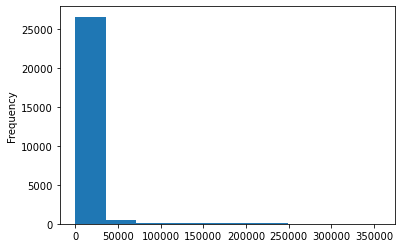

In [6]:
covid["Confirmed"].plot.hist()

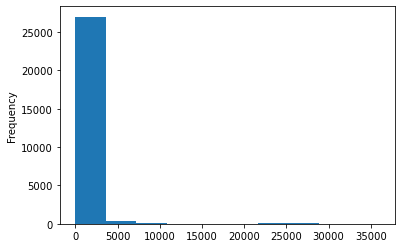

In [7]:
covid["Deaths"].plot.hist()

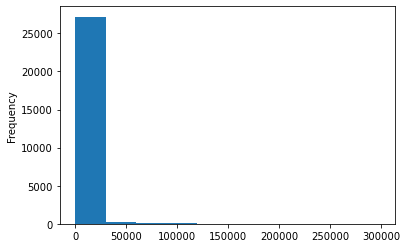

In [8]:
covid["Recovered"].plot.hist()

In [9]:
df_brasil = covid[covid['Country/Region'] == 'Brazil']
df_brasil.shape

(141, 8)

In [10]:
df_brasil.head(100)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
27027,27028,05/20/2020,Mato Grosso,Brazil,2020-05-21 02:32:48,1054.0,32.0,0.0
27028,27029,05/20/2020,Mato Grosso do Sul,Brazil,2020-05-21 02:32:48,693.0,17.0,0.0
27037,27038,05/20/2020,Minas Gerais,Brazil,2020-05-21 02:32:48,5286.0,177.0,0.0
27078,27079,05/20/2020,Para,Brazil,2020-05-21 02:32:48,18135.0,1633.0,0.0


# Graficos

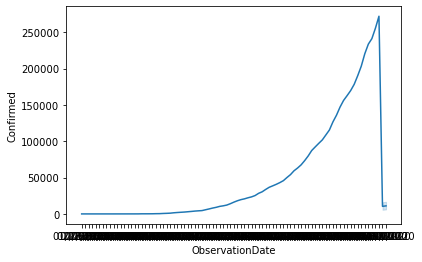

In [11]:
sns.lineplot(df_brasil["ObservationDate"], df_brasil["Confirmed"]);

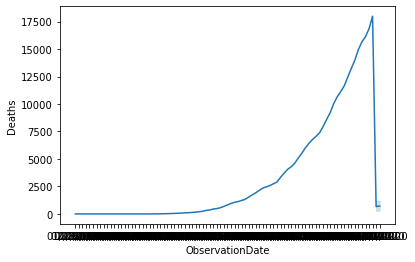

In [12]:
sns.lineplot(df_brasil["ObservationDate"], df_brasil["Deaths"]);

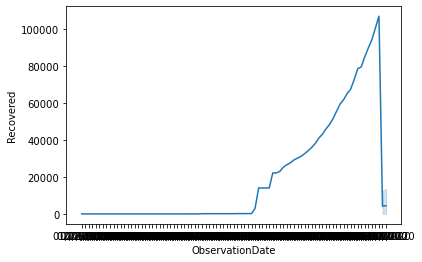

In [13]:
sns.lineplot(df_brasil["ObservationDate"], df_brasil["Recovered"]);

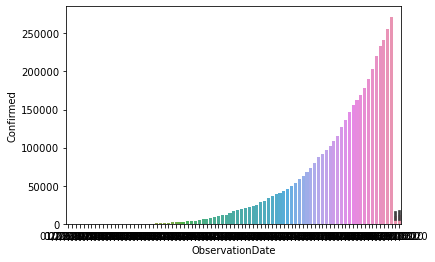

In [14]:
sns.barplot(df_brasil["ObservationDate"], df_brasil['Confirmed'])

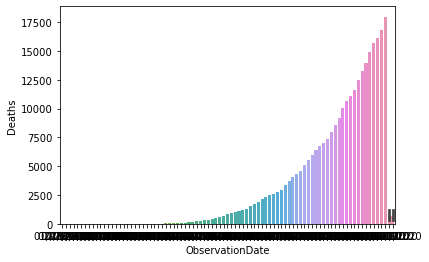

In [15]:
sns.barplot(df_brasil["ObservationDate"], df_brasil["Deaths"])

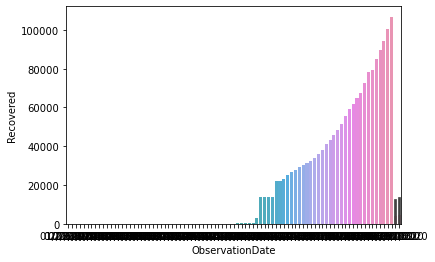

In [16]:
sns.barplot(df_brasil["ObservationDate"], df_brasil["Recovered"])

In [25]:
df_sum = covid.groupby('ObservationDate').agg({"Confirmed": 
                                               'sum', 
                                               "Deaths": 'sum', 
                                               'Recovered': 'sum'}).reset_index()

In [18]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [19]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered
116,05/17/2020,4713620.0,315185.0,1733963.0
117,05/18/2020,4801943.0,318481.0,1786875.0
118,05/19/2020,4897492.0,323285.0,1838995.0
119,05/20/2020,4996472.0,328115.0,1897466.0
120,05/21/2020,5102424.0,332924.0,1948739.0


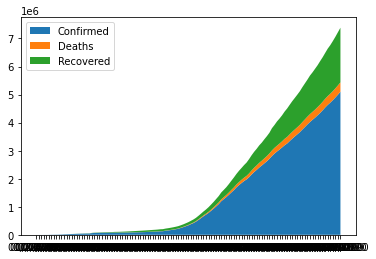

In [23]:
plt.stackplot(df_sum["ObservationDate"], 
              [df_sum['Confirmed'], 
               df_sum['Deaths'], 
               df_sum["Recovered"]],
             labels = ["Confirmed", "Deaths", "Recovered"])

plt.legend(loc = "upper left")

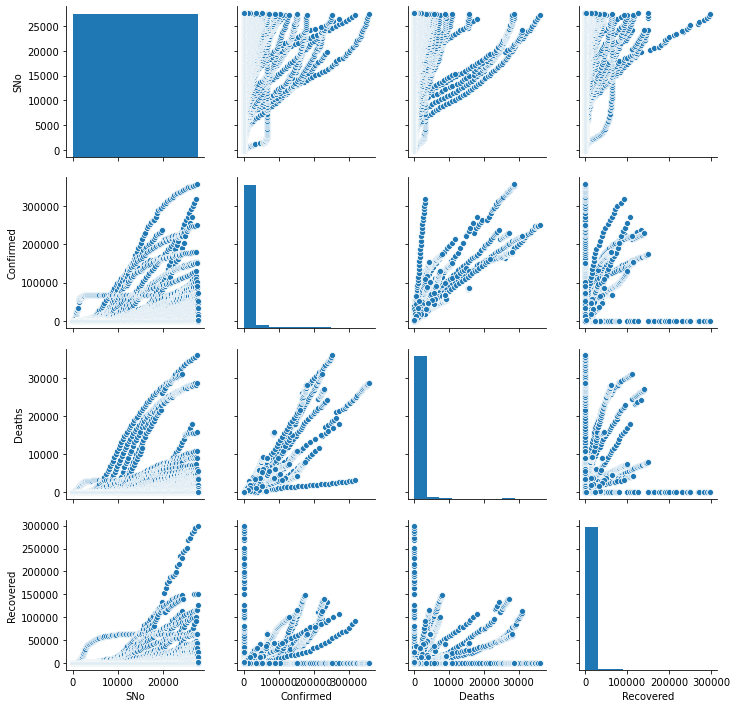

In [21]:
sns.pairplot(covid)